<a href="https://colab.research.google.com/github/CamTu22/DAOTHICAMTU_20104009/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_ti%E1%BB%81n_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Phân biệt tiền giấy
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Money/

/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Money


In [3]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Money/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 839 images belonging to 9 classes.


In [4]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Money/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 95 images belonging to 9 classes.


In [5]:
train_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [6]:
test_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [14]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

In [15]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
27/27 [==============================] - 609s 22s/step - loss: 8.5110 - accuracy: 0.1287 - val_loss: 2.1929 - val_accuracy: 0.1158
Epoch 2/100
27/27 [==============================] - 29s 1s/step - loss: 2.1678 - accuracy: 0.1824 - val_loss: 2.2199 - val_accuracy: 0.1158
Epoch 3/100
27/27 [==============================] - 30s 1s/step - loss: 2.0782 - accuracy: 0.2348 - val_loss: 2.2272 - val_accuracy: 0.1579
Epoch 4/100
27/27 [==============================] - 29s 1s/step - loss: 2.0322 - accuracy: 0.2312 - val_loss: 2.2029 - val_accuracy: 0.1263
Epoch 5/100
27/27 [==============================] - 29s 1s/step - loss: 1.9548 - accuracy: 0.2682 - val_loss: 2.2472 - val_accuracy: 0.1158
Epoch 6/100
27/27 [==============================] - 29s 1s/step - loss: 1.9357 - accuracy: 0.2837 - val_loss: 2.2163 - val_accuracy: 0.1579
Epoch 7/100
27/27 [==============================] - 29s 1s/step - loss: 1.8495 - accuracy: 0.3397 - val_loss: 2.4575 - val_accuracy: 0.1579
Epoch 8/100

In [19]:
model.save('money.h5')

In [20]:
model_money = load_model('money.h5')

1/1 [==============================] - 0s 19ms/step
20k


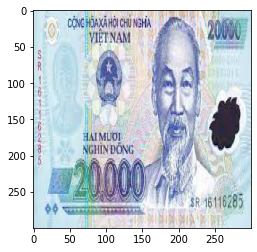

1/1 [==============================] - 0s 20ms/step
1k


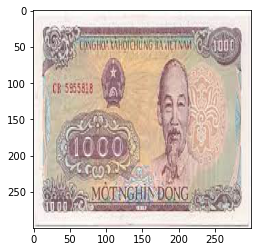

1/1 [==============================] - 0s 18ms/step
200k


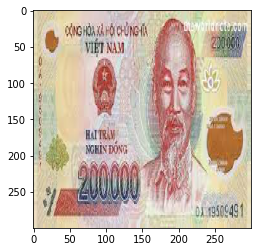

In [29]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Money/nhandang'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_money.predict(img)
  if round(result[0][0])==1:
    prediction='100k'
  if round(result[0][1])==1:
    prediction = '10k'
  if round(result[0][2])==1:
    prediction='1k'
  if round(result[0][3])==1:
    prediction='200k'
  if round(result[0][4])==1:
    prediction='20k'
  if round(result[0][5])==1:
    prediction='2k'
  if round(result[0][6])==1:
    prediction='500k'
  if round(result[0][7])==1:
    prediction='50k'
  if round(result[0][8])==1:
    prediction='5k'
  print(prediction)
  plt.show()